In [2]:
import pandas as pd

In [5]:
sample = pd.read_csv('sample_submission.csv', sep =',')
test = pd.read_csv('test.csv', sep =',')
df = pd.read_csv('train.csv', sep =',')


In [4]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# Seleccionar columnas relevantes
df = df[["GrLivArea", "YearBuilt", "OverallQual", "SalePrice"]]

# Eliminar valores nulos
df = df.dropna()

# Dividir datos en X (características) e Y (objetivo)
X = df[["GrLivArea", "YearBuilt", "OverallQual"]]
Y = df["SalePrice"]


In [8]:
#entrenando los datos para el modelo:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = Y.values.reshape(-1, 1)
Y = scaler.fit_transform(Y)


In [10]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 6.2 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.5 MB/s eta 0:00:00a 0:00:01


In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Desactiva la GPU, usa solo CPU

# Crear el modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=3, activation="relu"))
modelo.add(Dense(16, activation="relu"))
modelo.add(Dense(1, activation="linear"))

# Compilar el modelo
modelo.compile(optimizer="adam", loss="mean_squared_error")

# Entrenar el modelo
modelo.fit(X, Y, epochs=200, batch_size=32, verbose=1)


Epoch 1/200


/home/eduardo/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1346
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 13/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 14/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 15/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 16/200
46/

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Escaladores separados
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Ajustar y transformar X
X = scaler_X.fit_transform(X)

# Ajustar y transformar Y
Y = Y.reshape(-1, 1)
Y = scaler_Y.fit_transform(Y)



In [17]:
import numpy as np

# Nueva casa con 3 características
nueva_casa = np.array([[2000, 2005, 7]])  # GrLivArea, YearBuilt, OverallQual

# Normalizar la entrada con el scaler correcto
nueva_casa = scaler_X.transform(nueva_casa)

# Hacer la predicción
prediccion = modelo.predict(nueva_casa)

# Desnormalizar el resultado con scaler_Y
prediccion = scaler_Y.inverse_transform(prediccion)

print("Precio Predicho:", prediccion[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Precio Predicho: -1018.2777


In [25]:
# Entrenar el modelo y guardar el historial
historial = modelo.fit(X, Y, epochs=200, batch_size=32, verbose=1)



Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022   
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 13/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 14/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 15/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
E

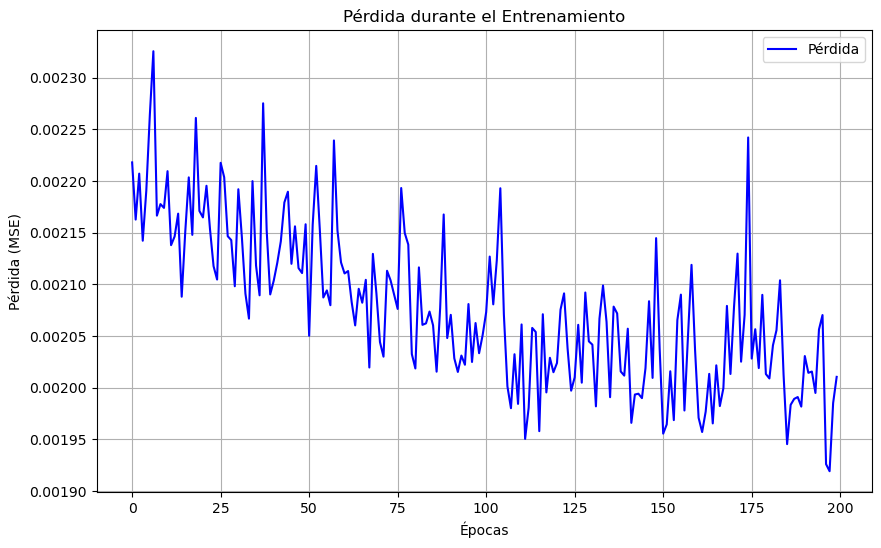

In [26]:
import matplotlib.pyplot as plt

# Obtener la pérdida desde el historial
perdida = historial.history["loss"]

# Gráfico de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(perdida, color='blue', label="Pérdida")
plt.title("Pérdida durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.grid(True)
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


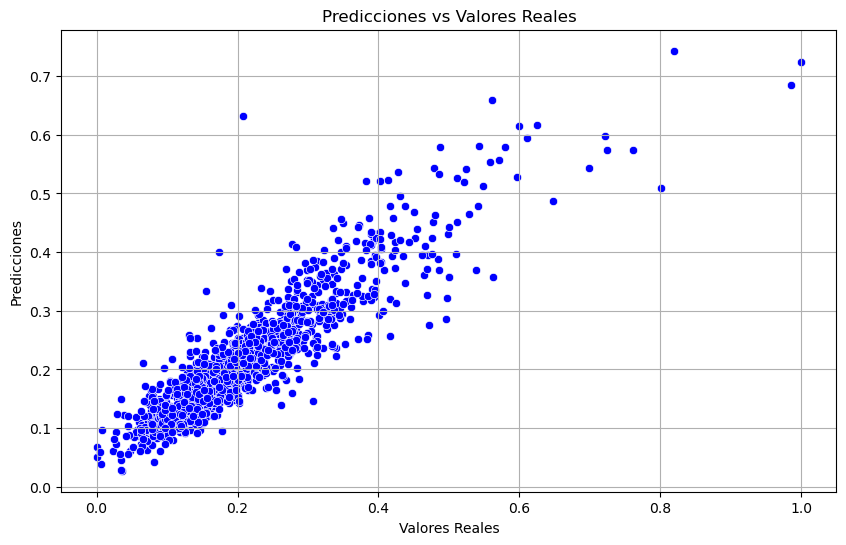

In [20]:
import seaborn as sns

# Hacer predicciones con los datos de entrenamiento
predicciones = modelo.predict(X)
predicciones = scaler_Y.inverse_transform(predicciones)
reales = scaler_Y.inverse_transform(Y)

# Convertir a DataFrame para graficar
resultado = pd.DataFrame({"Real": reales.flatten(), "Predicción": predicciones.flatten()})

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Real", y="Predicción", data=resultado, color="blue")
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


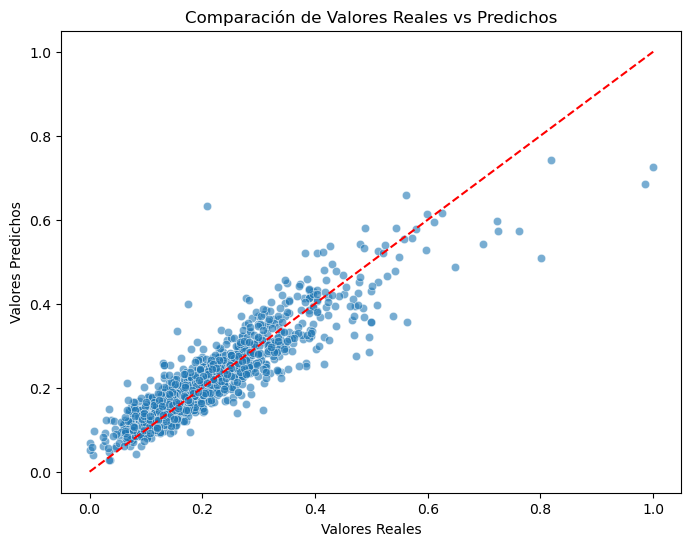

In [21]:
import seaborn as sns

# Predicciones sobre los datos de entrenamiento
Y_pred = modelo.predict(X)

# Desnormalizar los valores
Y_real = scaler_Y.inverse_transform(Y)
Y_pred = scaler_Y.inverse_transform(Y_pred)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_real.flatten(), y=Y_pred.flatten(), alpha=0.6)
plt.plot([min(Y_real), max(Y_real)], [min(Y_real), max(Y_real)], color="red", linestyle="--")  # Línea perfecta
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs Predichos")
plt.show()


In [22]:
#Métricas de evaluación

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(reales, predicciones)
mse = mean_squared_error(reales, predicciones)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.03
MSE: 0.00
RMSE: 0.05


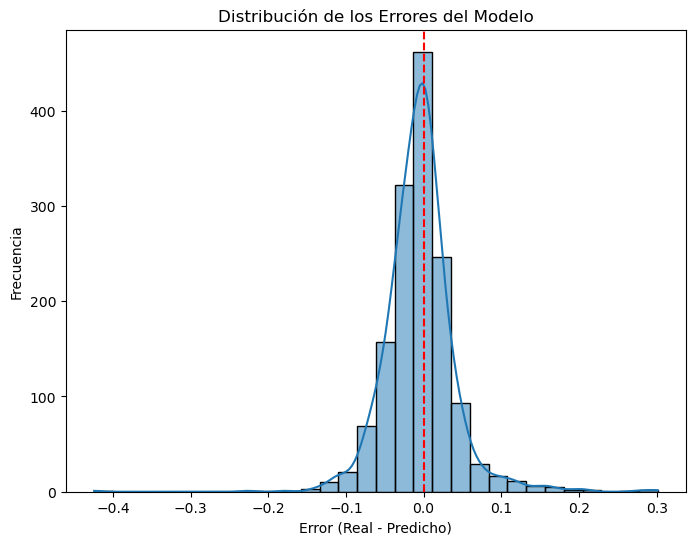

In [24]:
#distribución de errores:
# Calcular los errores
errores = Y_real.flatten() - Y_pred.flatten()

# Graficar la distribución de los errores
plt.figure(figsize=(8, 6))
sns.histplot(errores, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")  # Línea en cero para referencia
plt.xlabel("Error (Real - Predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores del Modelo")
plt.show()

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Input
import numpy as np

# Crear el objeto KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Crear un nuevo modelo para cada fold
    modelo = Sequential()
    modelo.add(Input(shape=(3,)))
    modelo.add(Dense(32, activation="relu"))
    modelo.add(Dense(16, activation="relu"))
    modelo.add(Dense(1, activation="linear"))

    modelo.compile(optimizer="adam", loss="mean_squared_error")

    # Entrenar el modelo
    historial = modelo.fit(X_train, Y_train, epochs=200, batch_size=32, verbose=0)

    # Hacer predicciones
    predicciones = modelo.predict(X_test)
    predicciones = scaler_Y.inverse_transform(predicciones)
    Y_test = scaler_Y.inverse_transform(Y_test)

    # Evaluar el rendimiento
    mae = mean_absolute_error(Y_test, predicciones)
    mse = mean_squared_error(Y_test, predicciones)
    rmse = np.sqrt(mse)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print(f"MAE promedio: {np.mean(mae_scores):.2f}")
print(f"MSE promedio: {np.mean(mse_scores):.2f}")
print(f"RMSE promedio: {np.mean(rmse_scores):.2f}")



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MAE promedio: 0.03
MSE promedio: 0.00
RMSE promedio: 0.05


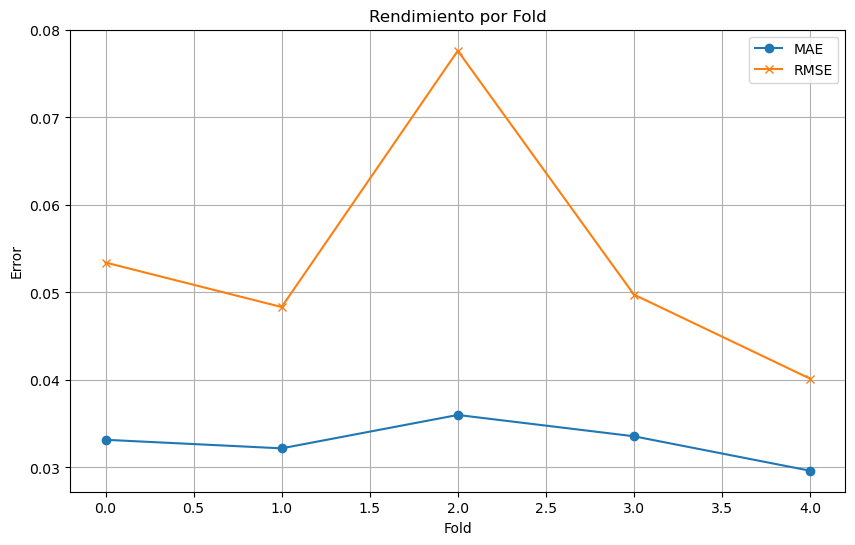

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(mae_scores, marker='o', label="MAE")
plt.plot(rmse_scores, marker='x', label="RMSE")
plt.title("Rendimiento por Fold")
plt.xlabel("Fold")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir Early Stopping
early_stopping = EarlyStopping(
    monitor="loss",        # Métrica a monitorear (también puede ser "val_loss" si tienes datos de validación)
    patience=20,           # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True,  # Restaura los mejores pesos al finalizar
    verbose=1             # Imprime mensajes cuando detiene el entrenamiento
)

# Entrenamiento con Early Stopping
historial = modelo.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 10/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 11/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 12/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 13/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 14/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 15/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoc

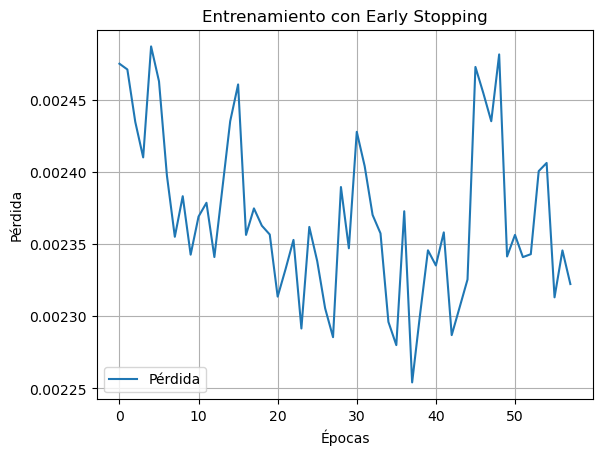

In [31]:
plt.plot(historial.history["loss"], label="Pérdida")
plt.title("Entrenamiento con Early Stopping")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid(True)
plt.show()